# Phys 581 Winter 2019
# Assignment #2: Geomagnetic Bottle
## Alexander Hickey, 10169582

In [2]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

##### Task: 
Read  https://www2.mps.mpg.de/solar-system-school/lectures/space_plasma_physics_2007/Lecture_3.pdf and then numerically integrate the motion of a 1keV proton starting at the surface of the Earth ($r=6371km$) with latitude $66^\circ$ moving antiparallel to the local $\vec B$.  Assume the geomagnetic field is a dipole aligned with the spin axis with magnetic moment $M_E=8.05E22 A m^2$.

Does you result look like the plot in slide#7?  If not, what values (eg. energy, pitch angle, latitude) produce a better resemblance?

Magnetic field of a dipole in standard spherical coordinates:
$$\mathbf B(\mathbf r) = \frac{\mu_0}{4\pi} \frac{M_E}{r^3} \left( 2\cos{\theta} \hat r  + \sin \theta \mathbf{\hat{\theta}} \right)$$

where $M_E = 8.05 \times 10^{22} \text{ Am}^2$ is the magnetic dipole moment of the earth, and $\mu_0= 4\pi \times 10^{-7} \text{ Tm/A}$ is the permeability of free space.
Working with these numbers numbers directly will most likely lead to floating point error, so we start by making the equations of motion dimensionless. We will measure all distances in units of the radius of earth $R_E = 6371 \text{ km}$. Define a base unit of magnetic flux density

$$B_0 := \frac{\mu_0}{4 \pi} \frac{M_E}{R_E^3}$$

then we can rewrite the Earth's magnetic field as 

$$\frac{\mathbf B}{B_0}= \frac{1}{\rho^3}\left(2 \cos \theta \hat \rho + \sin \theta \hat \theta \right)$$

where the dimensionless radial coordinate is $\rho := r/R_E$, and $\hat \rho = \hat r$ is the same radial unit vector. 

Using the standard spherical to cartesian transformation, we have ...

In [169]:
T = 1.60218e-16 #Kinetic energy in J
RE = 6371e3 #Radius of earth in m
Lat = 66 #Latitude in degrees
ME = 8.05e22 #Magnetic moment of earth in Am^2
m = 1.6726219e-27 #Proton mass in kg
mu0 = 1e-7 #Normalized permeability mu_0/4pi
e = 1.60217662e-19 #Elementary charge in Coulombs
B0 = mu0*ME/RE**3
v0 = np.sqrt(2*T/m)
alpha = mu0*ME*e/m

################
alpha, v0 = 1e5, 1.0
2*np.pi*m/(1e-5*e)

0.006559447451272134

In [170]:
def cart_to_sphere(xyz):
    
    rtp = np.zeros(xyz.shape)
    xy = xyz[0]**2 + xyz[1]**2
    rtp[0] = np.sqrt(xy + xyz[2]**2)
    rtp[1] = np.arctan2(np.sqrt(xy), xyz[2]) # for elevation angle defined from Z-axis down
    rtp[2] = np.arctan2(xyz[1], xyz[0])
    
    return rtp

def sphere_to_cart(rtp):
    
    rtp = np.array(rtp)
    xyz = np.zeros(rtp.shape)
    
    xyz[0] = rtp[0]*np.sin(rtp[1])*np.cos(rtp[2])
    xyz[1] = rtp[0]*np.sin(rtp[1])*np.sin(rtp[2])
    xyz[2] = rtp[0]*np.cos(rtp[1])
    
    return xyz

def time_evol(tau,state):
    
    state = np.array(state)
    newstate = np.zeros(state.shape)
    vr,vt,vp,r,th,p = state
    
    global alpha
    
    newstate[0] = r*vt*vt+r*vp*vp*np.sin(th)**2-alpha*vp*np.sin(th)**2/r**2
    newstate[1] = vp*vp*np.sin(th)*np.cos(th)-2.0/r*vr*vt+2.0*alpha*vp*np.sin(th)*np.cos(th)/r**3
    newstate[2] = -2.0*vr*vp/r-2.0*vt*vp/np.tan(th)+alpha/r**4*(vr-2.0*r*vt/np.tan(th))
    newstate[3] = vr
    newstate[4] = vt
    newstate[5] = vp
    
    return newstate

In [171]:
#Initialize:
r,theta,phi = 1,(90-Lat)*np.pi/180,0.0

B0vec = m*alpha/(e*r**3)*np.array([2*np.cos(theta),np.sin(theta),0])
vr, vt, vp = v0*B0vec/np.linalg.norm(B0vec)
s0 = np.array([vr,vt,vp,r,theta,phi])
s0

array([0.97610594, 0.21729518, 0.        , 1.        , 0.41887902,
       0.        ])

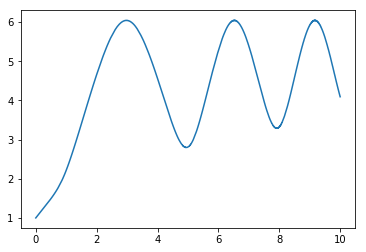

In [191]:
t_span = (0.,10.)
res = scipy.integrate.solve_ivp(time_evol,t_span,s0)
resy = res.y
rf, tf, pf = resy[3], resy[4], resy[5]
plt.plot(res.t,rf)

0


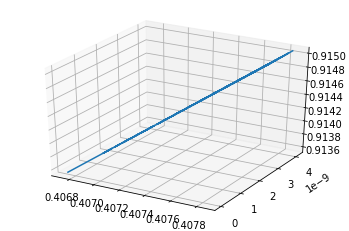

In [192]:
x, y, z = sphere_to_cart([rf,tf,pf])
ma = x**2+y**2+z**2
for j in range(len(ma)):
    if ma[j] < 1:
        print(j)
        break
        
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(x[:205],y[:205],z[:205])
